In [28]:
from qiskit import QuantumCircuit, transpile
from qiskit.circuit.library import RYGate,XGate
from qiskit.circuit import Parameter
from qiskit.providers import BackendV2, Options
from qiskit.transpiler import Target, InstructionProperties
import numpy as np

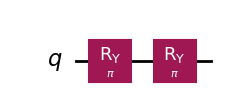

In [29]:
qc = QuantumCircuit(1)
qc.ry(np.pi, 0)
qc.ry(np.pi, 0)
qc.draw("mpl")

In [30]:
class Backend(BackendV2):
    def __init__(self):
        super().__init__(name="IHHI")
        num_qubits = 1
        self._target = Target("CHIPIHHI", 1)

        self._target.add_instruction(RYGate(Parameter("theta")), {(0,): InstructionProperties(error=0.0, duration=0.0)})
        self._target.add_instruction(XGate(), {(0,): InstructionProperties(error=0.0, duration=0.0)})

    @property
    def target(self):
        return self._target

    @property
    def max_circuits(self):
        return None
    
    @classmethod
    def _default_options(cls):
        return Options(shots=1000)
 
    def run(self, circuit, **kwargs):
        raise NotImplementedError(
            "This backend does not contain a run method"
        )

In [31]:
backend = Backend()

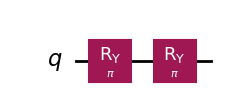

In [33]:
transpile(qc, backend, optimization_level=3).draw('mpl')